### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import pandas as pd
# import torch
# print(torch.cuda.is_available())

True


In [3]:
df=pd.read_csv('india.csv')

In [4]:
df.head(10)

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,47746.22,6188.22,41606.81,47789.04,25640.12,7120958.0,N.A.
1,30DEC2019_00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22:30 - 23:00,41479.49,-78.51,41606.81,41607.49,41444.63,1365.0,N.A.
3,23:00 - 23:30,41417.40,-62.09,41480.95,41483.97,41384.20,1797.0,N.A.
4,23:30 - 00:00,41409.97,-7.43,41417.49,41442.61,41383.68,1797.0,N.A.
5,31DEC2019_00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,00:00 - 00:30,41376.39,-33.58,41409.97,41416.09,41372.15,1798.0,N.A.
7,00:30 - 01:00,41373.46,-2.93,41376.39,41399.50,41349.61,1797.0,N.A.
8,01:00 - 01:30,41486.16,112.70,41373.46,41504.09,41373.46,1798.0,N.A.
9,01:30 - 02:00,41418.06,-68.10,41486.56,41489.61,41416.50,1798.0,N.A.


In [5]:
df=df.dropna()

In [6]:
df.head(10)

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,47746.22,6188.22,41606.81,47789.04,25640.12,7120958.0,N.A.
2,22:30 - 23:00,41479.49,-78.51,41606.81,41607.49,41444.63,1365.0,N.A.
3,23:00 - 23:30,41417.40,-62.09,41480.95,41483.97,41384.20,1797.0,N.A.
4,23:30 - 00:00,41409.97,-7.43,41417.49,41442.61,41383.68,1797.0,N.A.
6,00:00 - 00:30,41376.39,-33.58,41409.97,41416.09,41372.15,1798.0,N.A.
7,00:30 - 01:00,41373.46,-2.93,41376.39,41399.50,41349.61,1797.0,N.A.
8,01:00 - 01:30,41486.16,112.70,41373.46,41504.09,41373.46,1798.0,N.A.
9,01:30 - 02:00,41418.06,-68.10,41486.56,41489.61,41416.50,1798.0,N.A.
10,02:00 - 02:30,41418.80,0.74,41418.06,41431.41,41405.36,1797.0,N.A.
11,02:30 - 03:00,41436.96,18.16,41418.45,41450.02,41415.41,1798.0,N.A.


In [7]:
# df.index=[i for i in range(len(df))] or df.reset_index(inplace=True) to make indices in 1,2,3 order
df.head(10)
# print(df.loc[0])

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,47746.22,6188.22,41606.81,47789.04,25640.12,7120958.0,N.A.
2,22:30 - 23:00,41479.49,-78.51,41606.81,41607.49,41444.63,1365.0,N.A.
3,23:00 - 23:30,41417.40,-62.09,41480.95,41483.97,41384.20,1797.0,N.A.
4,23:30 - 00:00,41409.97,-7.43,41417.49,41442.61,41383.68,1797.0,N.A.
6,00:00 - 00:30,41376.39,-33.58,41409.97,41416.09,41372.15,1798.0,N.A.
7,00:30 - 01:00,41373.46,-2.93,41376.39,41399.50,41349.61,1797.0,N.A.
8,01:00 - 01:30,41486.16,112.70,41373.46,41504.09,41373.46,1798.0,N.A.
9,01:30 - 02:00,41418.06,-68.10,41486.56,41489.61,41416.50,1798.0,N.A.
10,02:00 - 02:30,41418.80,0.74,41418.06,41431.41,41405.36,1797.0,N.A.
11,02:30 - 03:00,41436.96,18.16,41418.45,41450.02,41415.41,1798.0,N.A.


In [8]:
df1=df.reset_index()['Close']

In [9]:
df1

0       47746.22
1       41479.49
2       41417.40
3       41409.97
4       41376.39
          ...   
4016    47663.50
4017    47724.84
4018    47746.22
4019    47746.22
4020    47746.22
Name: Close, Length: 4021, dtype: float64

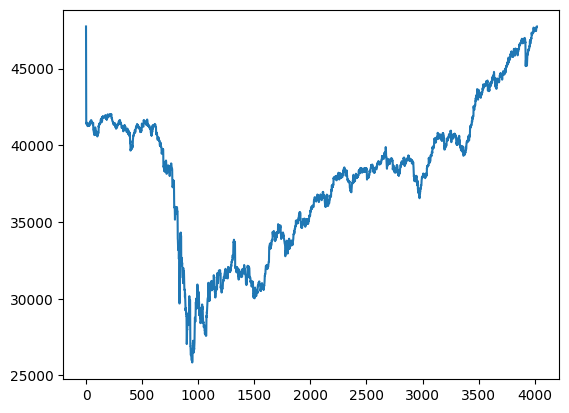

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0       47746.22
1       41479.49
2       41417.40
3       41409.97
4       41376.39
          ...   
4016    47663.50
4017    47724.84
4018    47746.22
4019    47746.22
4020    47746.22
Name: Close, Length: 4021, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[1.        ]
 [0.71386833]
 [0.71103337]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(2613, 1408)

In [18]:
train_data

array([[1.        ],
       [0.71386833],
       [0.71103337],
       ...,
       [0.59061181],
       [0.59194596],
       [0.59523751]])

In [19]:
test_data

array([[0.59448094],
       [0.59391066],
       [0.59567309],
       ...,
       [1.        ],
       [1.        ],
       [1.        ]])

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(2512, 100)
(2512,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(1307, 100)
(1307,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
print(X_train.shape)

(2512, 100, 1)


In [26]:
#pip install tensorflow

In [27]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
40/40 [==============================] - 9s 67ms/step - loss: 0.0179 - val_loss: 0.0011
Epoch 2/100
40/40 [==============================] - 1s 32ms/step - loss: 8.2033e-04 - val_loss: 3.3779e-04
Epoch 3/100
40/40 [==============================] - 1s 32ms/step - loss: 6.2104e-04 - val_loss: 4.9532e-04
Epoch 4/100
40/40 [==============================] - 2s 39ms/step - loss: 6.4052e-04 - val_loss: 6.6644e-04
Epoch 5/100
40/40 [==============================] - 2s 38ms/step - loss: 6.2076e-04 - val_loss: 3.0766e-04
Epoch 6/100
40/40 [==============================] - 2s 45ms/step - loss: 5.9494e-04 - val_loss: 2.7048e-04
Epoch 7/100
40/40 [==============================] - 1s 32ms/step - loss: 5.6944e-04 - val_loss: 2.2142e-04
Epoch 8/100
40/40 [==============================] - 1s 32ms/step - loss: 5.5485e-04 - val_loss: 2.8178e-04
Epoch 9/100
40/40 [==============================] - 1s 33ms/step - loss: 5.4658e-04 - val_loss: 3.1481e-04
Epoch 10/100
40/40 [================

In [31]:
import tensorflow as tf

In [32]:
tf.__version__

'2.10.0'

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

41/41 [==============================] - 1s 12ms/step


In [34]:
train_predict.shape

(2512, 1)

In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

35904.33756061043

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

41857.364744844665

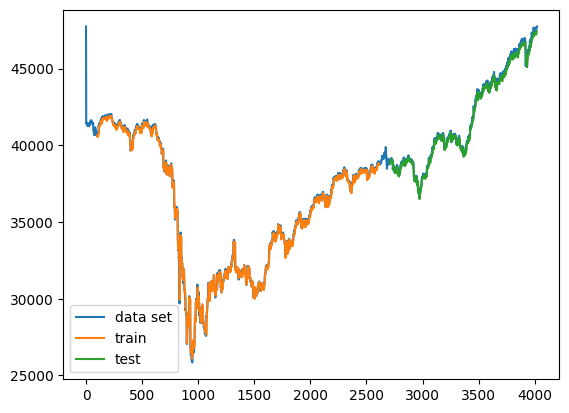

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data set','train','test'])
plt.show()

In [39]:
len(test_data)

1408

In [40]:
x_input=test_data[1308:].reshape(1,-1)
x_input.shape


(1, 100)

In [41]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [42]:
temp_input

[0.8936098615806363,
 0.8999039337837123,
 0.8999039337837123,
 0.8999039337837123,
 0.8983405748266331,
 0.8899959637578325,
 0.9008618564157072,
 0.8920962707679267,
 0.8868966411525023,
 0.888976401680976,
 0.8833987168037343,
 0.8910319630199859,
 0.8944933602903169,
 0.9076230186342888,
 0.9167296758769696,
 0.9149973791821222,
 0.9205800865326488,
 0.920575064059364,
 0.920575064059364,
 0.920575064059364,
 0.9252363758563313,
 0.9272951333147046,
 0.9313637932640413,
 0.929551136996634,
 0.9276608606875492,
 0.9321956974754309,
 0.9324335800737482,
 0.9335773342172886,
 0.931677469550114,
 0.9335887489292998,
 0.934606028063754,
 0.9358739742739788,
 0.9421461302299927,
 0.9405503534908015,
 0.9405503534908015,
 0.9405503534908015,
 0.9560437703980904,
 0.9558725497179195,
 0.9597001309495758,
 0.9550187292594678,
 0.9486634742000115,
 0.9500090404519126,
 0.9548032194966929,
 0.9550054881935348,
 0.9598448694978803,
 0.9613657657262769,
 0.9612749046186666,
 0.9650563704137971,

In [43]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9864631]
101
1 day input [0.89990393 0.89990393 0.89990393 0.89834057 0.88999596 0.90086186
 0.89209627 0.88689664 0.8889764  0.88339872 0.89103196 0.89449336
 0.90762302 0.91672968 0.91499738 0.92058009 0.92057506 0.92057506
 0.92057506 0.92523638 0.92729513 0.93136379 0.92955114 0.92766086
 0.9321957  0.93243358 0.93357733 0.93167747 0.93358875 0.93460603
 0.93587397 0.94214613 0.94055035 0.94055035 0.94055035 0.95604377
 0.95587255 0.95970013 0.95501873 0.94866347 0.95000904 0.95480322
 0.95500549 0.95984487 0.96136577 0.9612749  0.96505637 0.96284466
 0.96472032 0.96472032 0.96472032 0.98148214 0.9771409  0.97641081
 0.97560676 0.97574374 0.97703817 0.98005941 0.98158031 0.9796083
 0.98177481 0.98142233 0.98198713 0.9836135  0.98208027 0.98208027
 0.98208027 0.99507524 0.99667832 0.9951177  0.9859526  0.98500153
 0.98812687 0.98862547 0.9875849  0.99394564 0.99178826 0.99149832
 0.99193436 0.9933402  0.99392098 0.99392098 0.99392098 0.98986511
 0.9912198  0.9875639  0.99527522 0

10 day output [[0.93253314]]
11 day input [0.89103196 0.89449336 0.90762302 0.91672968 0.91499738 0.92058009
 0.92057506 0.92057506 0.92057506 0.92523638 0.92729513 0.93136379
 0.92955114 0.92766086 0.9321957  0.93243358 0.93357733 0.93167747
 0.93358875 0.93460603 0.93587397 0.94214613 0.94055035 0.94055035
 0.94055035 0.95604377 0.95587255 0.95970013 0.95501873 0.94866347
 0.95000904 0.95480322 0.95500549 0.95984487 0.96136577 0.9612749
 0.96505637 0.96284466 0.96472032 0.96472032 0.96472032 0.98148214
 0.9771409  0.97641081 0.97560676 0.97574374 0.97703817 0.98005941
 0.98158031 0.9796083  0.98177481 0.98142233 0.98198713 0.9836135
 0.98208027 0.98208027 0.98208027 0.99507524 0.99667832 0.9951177
 0.9859526  0.98500153 0.98812687 0.98862547 0.9875849  0.99394564
 0.99178826 0.99149832 0.99193436 0.9933402  0.99392098 0.99392098
 0.99392098 0.98986511 0.9912198  0.9875639  0.99527522 0.99407074
 0.99088512 0.99049018 0.98659867 0.98907977 0.99455427 0.99727965
 0.9962231  0.99902381 

19 day output [[0.89588845]]
20 day input [0.92523638 0.92729513 0.93136379 0.92955114 0.92766086 0.9321957
 0.93243358 0.93357733 0.93167747 0.93358875 0.93460603 0.93587397
 0.94214613 0.94055035 0.94055035 0.94055035 0.95604377 0.95587255
 0.95970013 0.95501873 0.94866347 0.95000904 0.95480322 0.95500549
 0.95984487 0.96136577 0.9612749  0.96505637 0.96284466 0.96472032
 0.96472032 0.96472032 0.98148214 0.9771409  0.97641081 0.97560676
 0.97574374 0.97703817 0.98005941 0.98158031 0.9796083  0.98177481
 0.98142233 0.98198713 0.9836135  0.98208027 0.98208027 0.98208027
 0.99507524 0.99667832 0.9951177  0.9859526  0.98500153 0.98812687
 0.98862547 0.9875849  0.99394564 0.99178826 0.99149832 0.99193436
 0.9933402  0.99392098 0.99392098 0.99392098 0.98986511 0.9912198
 0.9875639  0.99527522 0.99407074 0.99088512 0.99049018 0.98659867
 0.98907977 0.99455427 0.99727965 0.9962231  0.99902381 1.
 1.         1.         0.98646313 0.97838002 0.97030407 0.96360105
 0.95807332 0.9533509  0.94908

29 day output [[0.8609826]]
[[0.9864631295204163], [0.978380024433136], [0.9703040719032288], [0.9636010527610779], [0.9580733180046082], [0.9533509016036987], [0.9490807056427002], [0.944990336894989], [0.9409098029136658], [0.9367610812187195], [0.9325331449508667], [0.9282535910606384], [0.9239653944969177], [0.9197105765342712], [0.9155212640762329], [0.9114170670509338], [0.9074055552482605], [0.9034853577613831], [0.8996493816375732], [0.8958884477615356], [0.8921929001808167], [0.8885543346405029], [0.8849659562110901], [0.8814228177070618], [0.8779215812683105], [0.8744598627090454], [0.8710362315177917], [0.8676494359970093], [0.8642986416816711], [0.8609825968742371]]


In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

4021

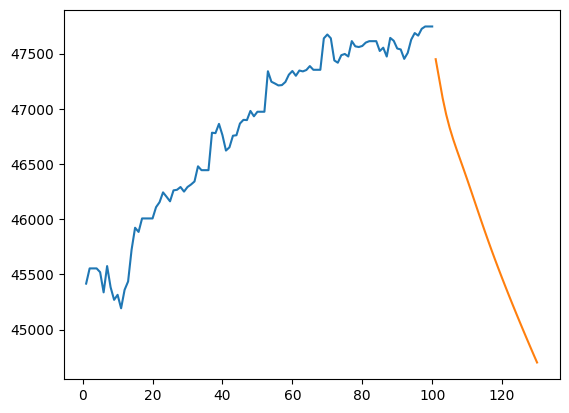

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[3921:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

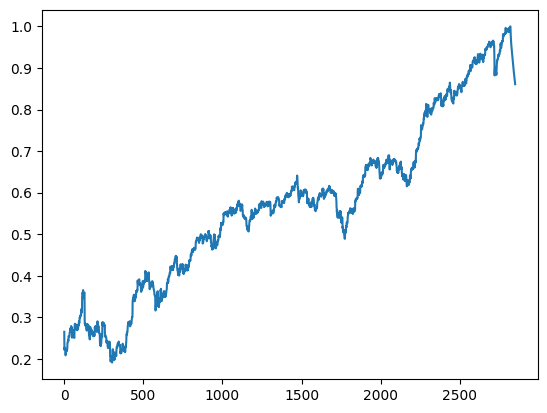

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

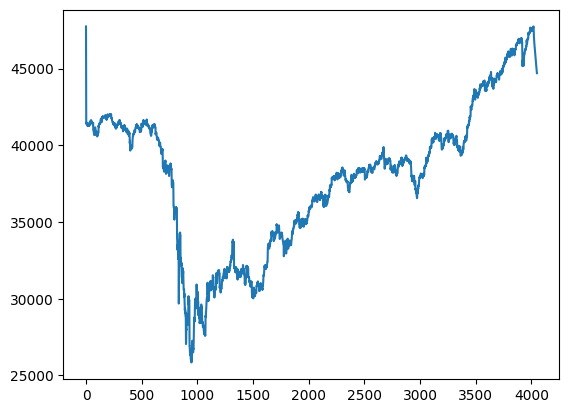

In [50]:
plt.plot(df3)